# Lecture Link - https://www.youtube.com/watch?v=MMEoEJIXd7E&list=PLl1irxoYh2wzOOU9hvJqMYc215wAlxrpp

# Code - https://github.com/blackdew/ml-tensorflow


# Sample imageset exercise

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# 이미지셋 가져오기
(mnist_x, mnist_y), _ = tf.keras.datasets.mnist.load_data()
print(mnist_x.shape, mnist_y.shape)

(cifar_x, cifar_y), _ = tf.keras.datasets.cifar10.load_data()
print(cifar_x.shape, cifar_y.shape)

(60000, 28, 28) (60000,)
(50000, 32, 32, 3) (50000, 1)


[5 0 4 ... 5 6 8]


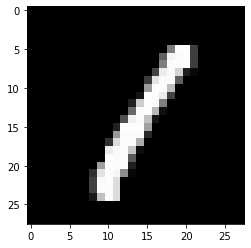

In [ ]:
print(mnist_y)

plt.imshow(mnist_x[3],cmap='gray')

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


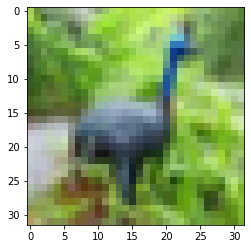

In [ ]:
print(cifar_y)

plt.imshow(cifar_x[6])

In [ ]:
d1 = np.array([1,2,3,4,5])
d2 = np.array([d1,d1,d1,d1])
print(d2.shape)
d3 = np.array([d2,d2,d2])
d3.shape

(4, 5)


(3, 4, 5)

In [ ]:
print(mnist_y.shape)
print(cifar_y.shape)

(60000,)
(50000, 1)


In [ ]:
print(cifar_y)


[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
print(mnist_y)

[5 0 4 ... 5 6 8]


# Flatten

## without flatten

In [ ]:
(ind, dep), _ = tf.keras.datasets.mnist.load_data()
print(ind.shape, dep.shape)

(60000, 28, 28) (60000,)


In [ ]:
# reshape
ind = ind.reshape(60000,784)
dep = pd.get_dummies(dep)  # 원핫 인코딩
print(ind.shape, dep.shape)

(60000, 784) (60000, 10)


In [ ]:
# 모델 만들기
X = tf.keras.layers.Input(shape=[784])
H = tf.keras.layers.Dense(84,activation = 'swish')(X)
Y = tf.keras.layers.Dense(10, activation = 'softmax')(H)
model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# 모델 학습
model.fit(ind,dep,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.9123 - accuracy: 0.8571
Epoch 2/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.5548 - accuracy: 0.9156
Epoch 3/10
1875/1875 [==============================] - 2s 835us/step - loss: 0.4770 - accuracy: 0.9304
Epoch 4/10
1875/1875 [==============================] - 2s 917us/step - loss: 0.4299 - accuracy: 0.93840s - loss: 0.4233 - accuracy
Epoch 5/10
1875/1875 [==============================] - 2s 872us/step - loss: 0.4158 - accuracy: 0.9422
Epoch 6/10
1875/1875 [==============================] - 2s 845us/step - loss: 0.4051 - accuracy: 0.9431
Epoch 7/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.3695 - accuracy: 0.9452
Epoch 8/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.3755 - accuracy: 0.9466
Epoch 9/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.3703 - accuracy: 0.9498
Epoch 10/10
1875/1875 [===============

In [ ]:
pred = model.predict(ind[0:5])
pd.DataFrame(pred).round(5)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,0.0,0.00000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00000,0.0,0.00000
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00001,0.0,0.99999


In [ ]:
pd.DataFrame(dep[0:5]).round(5)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


## with flatten

In [ ]:
(ind, dep), _ = tf.keras.datasets.mnist.load_data()
print(ind.shape, dep.shape)
# ind = ind.reshape(60000,784)
dep = pd.get_dummies(dep)  # 원핫 인코딩
print(ind.shape, dep.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28) (60000, 10)


In [ ]:
# 모델 만들기
X = tf.keras.layers.Input(shape=[28,28])
H = tf.keras.layers.Flatten()(X)
H = tf.keras.layers.Dense(84,activation = 'swish')(H)
Y = tf.keras.layers.Dense(10, activation = 'softmax')(H)
model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# 모델 학습
model.fit(ind, dep, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0541 - accuracy: 0.8521
Epoch 2/10
1875/1875 [==============================] - 2s 845us/step - loss: 0.5505 - accuracy: 0.9171
Epoch 3/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.4598 - accuracy: 0.9306
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4441 - accuracy: 0.9366
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3869 - accuracy: 0.9428
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3852 - accuracy: 0.9448
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3607 - accuracy: 0.9471
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3730 - accuracy: 0.9504
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3597 - accuracy: 0.9515
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0

# Conv2D
1. 필터셋을 몇 개 사용할 것인가
2. 필터셋의 사이즈를 얼마로 할 것인가
### ex) 
#### H = tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X)
#### 필터셋 개수 -> 3개, 3개의 특징맵을 만든다고 할 수 있다.
#### 필터셋 사이즈 -> 5
#### 이 이후에, flatten layer를 통해 픽셀 단위로 한 줄로 펼친 후 학습을 시작한다.
#### shape=[28,28,1]
##### -> 칼라 이미지는 3차원의 형태를 가지고 있다. 따라서 이에 따라 흑백 또한 3차원으로 설정을 한 후 학습을 한다.

# 필터의 이해
1. 필터셋은 3차원 형태로 된 가중치 모음
2. 필터셋 하나는 앞선 레이어의 결과인 "특정맵" 전체를 본다.
3. 필터셋 개수만큼 특징맵을 만든다.
## Conv2D(3, kernel_size=5, activation='swish 
## Conv2D(6, kernel_size=5, activation='swish')

# CNN 연산
## (8,8,1) 이미지에 (3,3,1) 필터를 씌우면 결과는
## (8-3+1,8-3+1)이 나온다.

# Convolution Layer

In [ ]:
(ind, dep), _ = tf.keras.datasets.mnist.load_data()
print(ind.shape, dep.shape)

ind = ind.reshape(60000,28,28,1)
dep = pd.get_dummies(dep)
print(ind.shape, dep.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [ ]:
# 모델 생성
X = tf.keras.layers.Input(shape=[28,28,1])
H = tf.keras.layers.Conv2D(3,kernel_size=5, activation='swish')(X)
H = tf.keras.layers.Conv2D(6,kernel_size=5, activation='swish')(H)
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(84,activation='swish')(H)
Y = tf.keras.layers.Dense(10,activation='softmax')(H)

model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
# 모델 학습
model.fit(ind,dep,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8315 - accuracy: 0.9252
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0973 - accuracy: 0.9735
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0653 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0510 - accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0425 - accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0341 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0306 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0273 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0250 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 22s 12m

In [ ]:
# 모델 이용
pred = model.predict(ind[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.03,0.0,0.97,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00,1.0,0.00,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0


In [ ]:
dep[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [ ]:
model.summary() # 모양 확인

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 3)         78        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 6)         456       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 84)                201684    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                850       
Total params: 203,068
Trainable params: 203,068
Non-trainable params: 0
_____________________________________________________

# 위의 결과 요약
## flatten의 2400 = 20 * 20* 6
## dense_6의 84개는 84개의 수식이 있다는 의미
## 84*(2400+1) -> 201684 (가중치 개수), 1은 bias

### 가중치 개수를 줄이기 위해 pooling을 사용한다
### 여러 pooling이 있는데, MaxPooling은 각 필터에 해당하는 픽셀에서의 가장 큰 값을 추출하여 이미지를 추출한다. 
### 값이 크다는 의미는 필터로 찾으려는 특징이 많이 나타난 부분이므로, 그러한 부분들만 추출하는 방법이다. 즉, 유의미한 부분만 남기면서 사이즈를 줄이는 방법이다.

# Pooling Layer

In [ ]:
(ind, dep), _ = tf.keras.datasets.mnist.load_data()
print(ind.shape, dep.shape)

ind = ind.reshape(60000,28,28,1)
dep = pd.get_dummies(dep)
print(ind.shape, dep.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [ ]:
# CNN 모델 생성
X = tf.keras.layers.Input(shape=[28,28,1])

H = tf.keras.layers.Conv2D(3,kernel_size=5, activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(6,kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(84,activation='swish')(H)
Y = tf.keras.layers.Dense(10,activation='softmax')(H)

model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
# 모델 학습
model.fit(ind,dep,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6889 - accuracy: 0.8719
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1299 - accuracy: 0.9608
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1019 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0895 - accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0802 - accuracy: 0.9758
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0770 - accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0702 - accuracy: 0.9797
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0690 - accuracy: 0.9794
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0657 - accuracy: 0.9808
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 3)         78        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 6)           456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 6)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 84)                8148

# LeNet 5

In [ ]:
# 데이터 로딩
(ind,dep), _ = tf.keras.datasets.mnist.load_data()
ind = ind.reshape(60000,28,28,1)
dep = pd.get_dummies(dep)

In [ ]:
# 모델 생성
X = tf.keras.layers.Input(shape=[28,28,1])

H = tf.keras.layers.Conv2D(6,kernel_size=5,padding='same',activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16,kernel_size=5,activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)

H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10,activation='softmax')(H)

model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
model.fit(ind,dep)

1875/1875 [==============================] - 20s 10ms/step - loss: 0.3095 - accuracy: 0.9330


# Cifar 10

In [ ]:
# 데이터 로딩
(ind,dep), _ = tf.keras.datasets.cifar10.load_data()
# ind = ind.reshape(60000,28,28,1)
dep = pd.get_dummies(dep.reshape(50000))  # mnist 데이터와 달리 1차원 데이터이기 떄문에 reshape 해줘야함

In [ ]:
# 모델 생성
X = tf.keras.layers.Input(shape=[32,32,3])

H = tf.keras.layers.Conv2D(6,kernel_size=5,activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16,kernel_size=5,activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)

H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10,activation='softmax')(H)

model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
# model.fit(ind,dep,epochs=10)

In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)               4812

# 이미지 사용